# TP Final - Análisis de Series Temporales - Especialización en Inteligencia Artificial

## Weekly fuel prices in Italy:

Weekly fuel prices in Italy from 03/2005 to 08/2021. Extracted from the Italy Government website (link: https://dgsaie.mise.gov.it/open-data)


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import curve_fit
matplotlib.rcParams['figure.figsize'] = [18,8]
import warnings
warnings.filterwarnings("ignore")

# Graficar una serie a partir de un dataset relevante. Describir observaciones.

In [2]:
df = pd.read_csv("datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv", index_col=0)
df = df.sort_values(by="survey_date")
df

,product_id,product_name,price,vat,excise,net,change
survey_date,,,,,,,
2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21
...,...,...,...,...,...,...,...
2022-10-31,1,Euro-Super 95,1677.74,302.54,478.40,896.80,-13.50
2022-10-31,2,Automotive gas oil,1865.54,336.41,367.40,1161.73,-14.54
2022-10-31,3,Heating gas oil,1866.61,336.60,403.21,1126.80,-15.61


<AxesSubplot:xlabel='survey_date'>

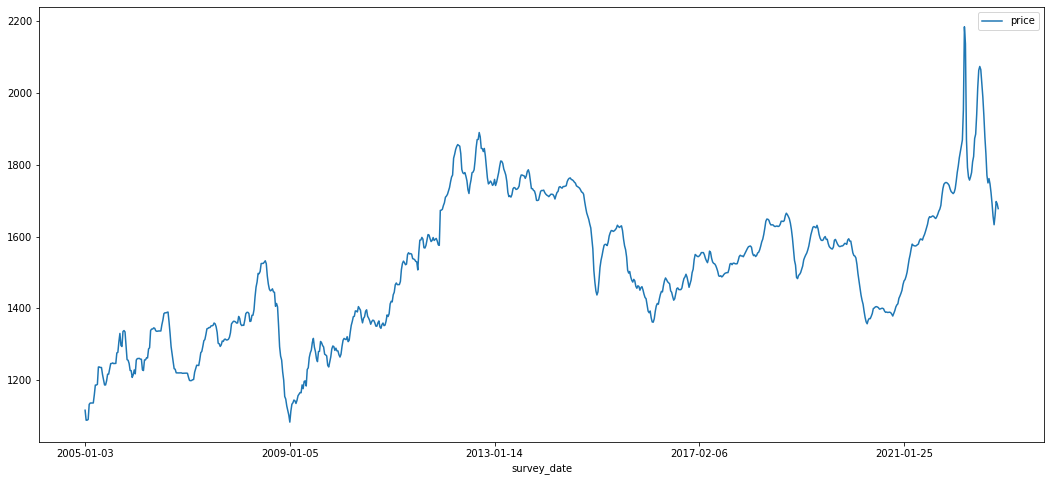

In [3]:
matplotlib.rcParams['figure.figsize'] = [18,8]
df=df.groupby('product_name')['price'].get_group('Euro-Super 95')
df.plot(legend=True)

El precio de la gasolina "Euro-Super 95" en Italia a lo largo de los años 2005 a 2021 no presenta estacionalidad ni estacionariedad. La serie presenta una tendencia creciente. Se encuentra un mínimo global a principios de 2009, y locales a mediados de 2016 y a fines de 2020, mientras que hay un pico global a mediados de 2022 del precio, seguido de un notable descenso para aumentar nuevamente y caso alcanzar el mismo valor de pico.

# Descomponer una serie de tiempo usando el modelo aditivo de cuatro componentes

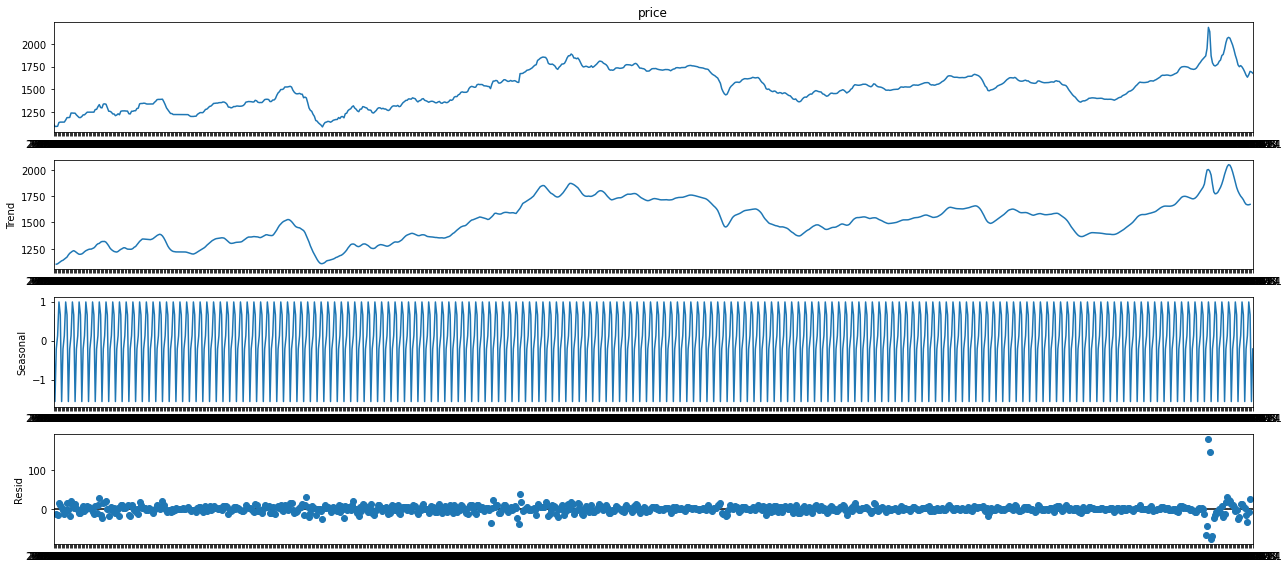

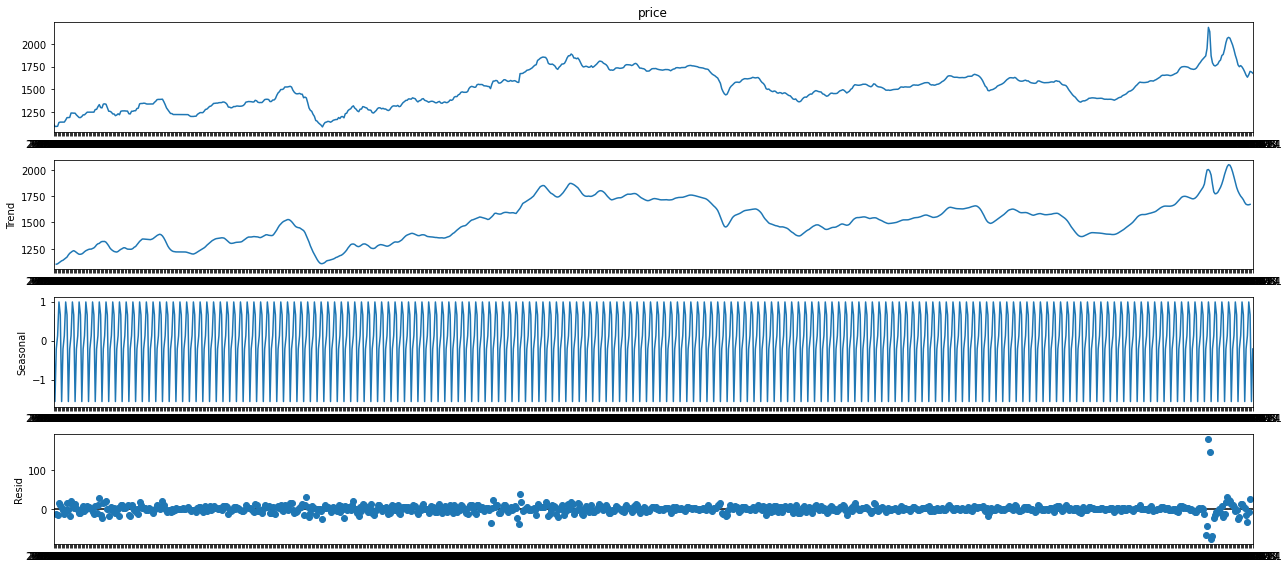

In [33]:
addit = sm.tsa.seasonal_decompose(df, model='additive', period=5)
addit.plot()

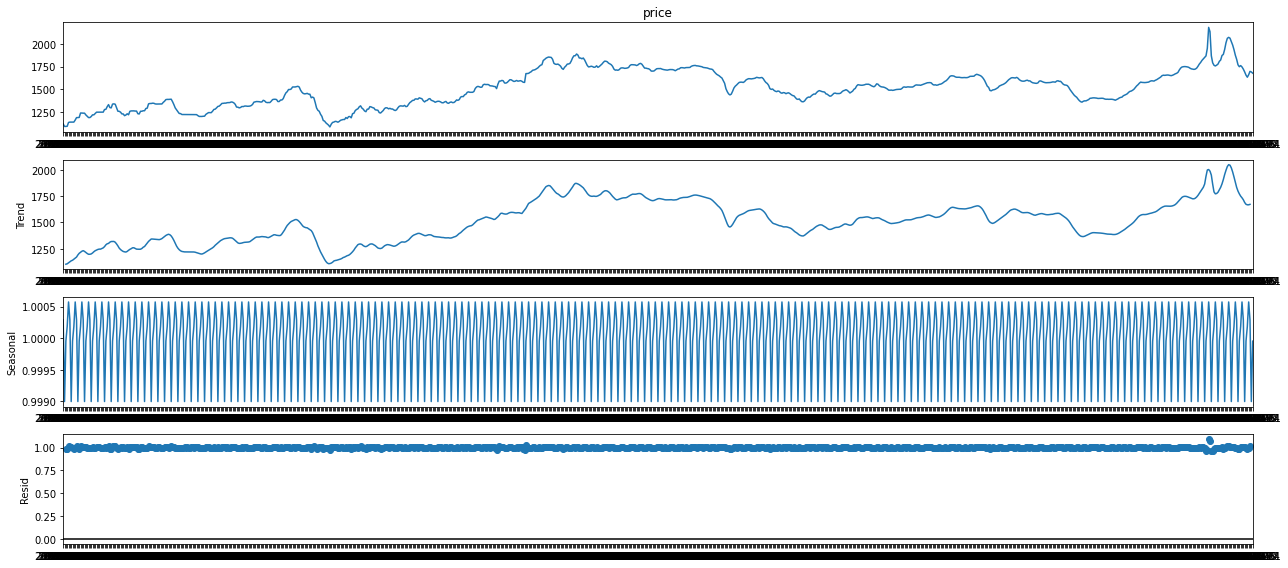

In [34]:
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=5)
mult.plot(); plt.show()

Al hacer la descomposición de la serie, se observa una clara componente cuatrienal caracterizado por un fuerte descenso del valor del precio de la gasolina analizada, seguido de una abrupta recuperación del precio en un plazo de tiempo muy pequeño. La tendencia es ascendente hasta casi la mitad del período registrado con un suave descenso posterior. Se podría modelar a través de una función polinómica.

## Extraer la tendencia y ajustar un modelo determinístico. Explicar su relación con el contexto. Obtener conclusiones acerca de la validez del modelo.

### Tendencia:

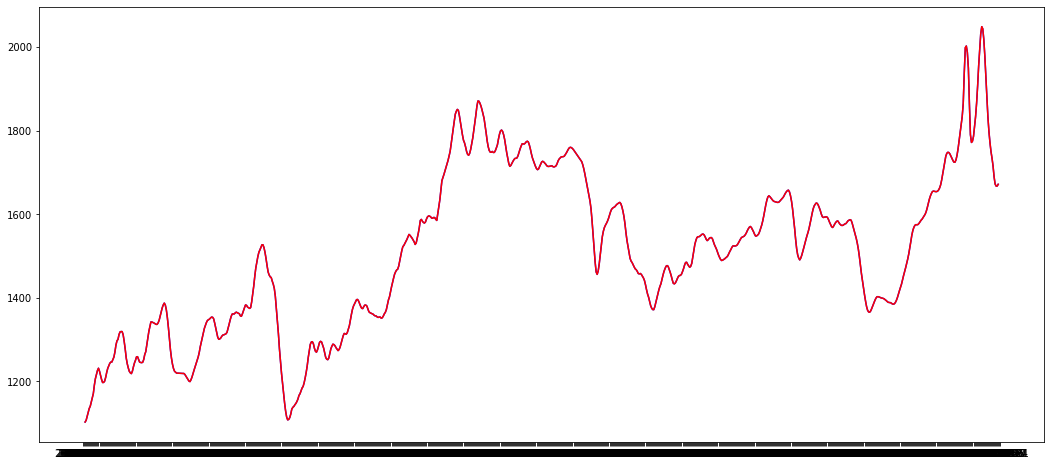

In [76]:
matplotlib.rcParams['figure.figsize'] = [18,8]
addit = sm.tsa.seasonal_decompose(df, model='additive', period=5)
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=5)
plt.plot(addit.trend, color="blue")
plt.plot(mult.trend, color="red")
plt.show()

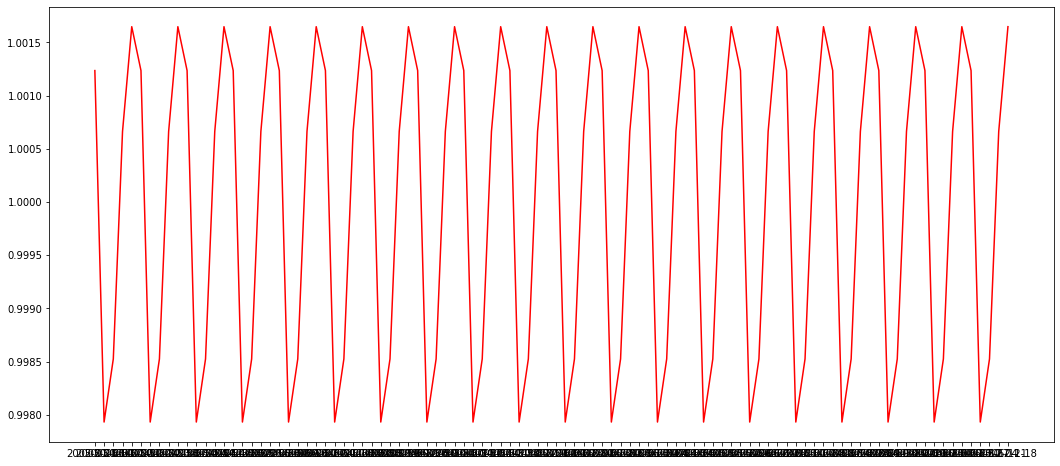

In [77]:
#Ploteo menos años:
matplotlib.rcParams['figure.figsize'] = [18,8]
temp_df = df[0:100]
addit = sm.tsa.seasonal_decompose(temp_df, model='additive', period=5)
mult = sm.tsa.seasonal_decompose(temp_df, model='multiplicative', period=5)
plt.plot(mult.seasonal, color="red")
plt.show()

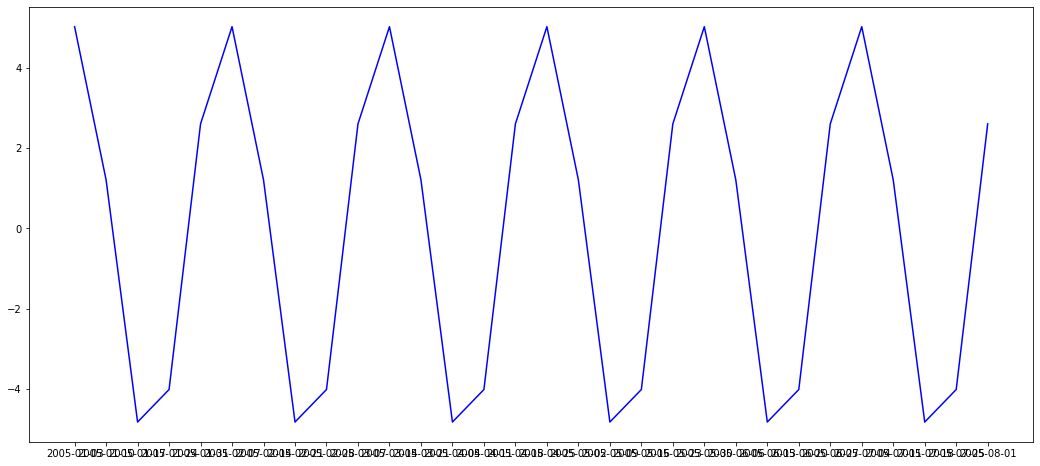

In [78]:
#Ploteo menos años:
matplotlib.rcParams['figure.figsize'] = [18,8]
temp_df = df[0:30]
addit = sm.tsa.seasonal_decompose(temp_df, model='additive', period=5)
mult = sm.tsa.seasonal_decompose(temp_df, model='multiplicative', period=5)
plt.plot(addit.seasonal, color="blue")
plt.show()

## Ajuste de un modelo determinístico

In [64]:
type(df)

pandas.core.series.Series

In [72]:
sig = df[0:884]
N = 52 # semanas
sample = 5 # años

dataframe = pd.Series(sig)
ts = pd.DataFrame(dataframe.values)
rows = int((len(ts)+1)/N)
data = ts.values.reshape(rows, N)
betas = data.mean(axis=0)
est = np.tile(betas,rows)

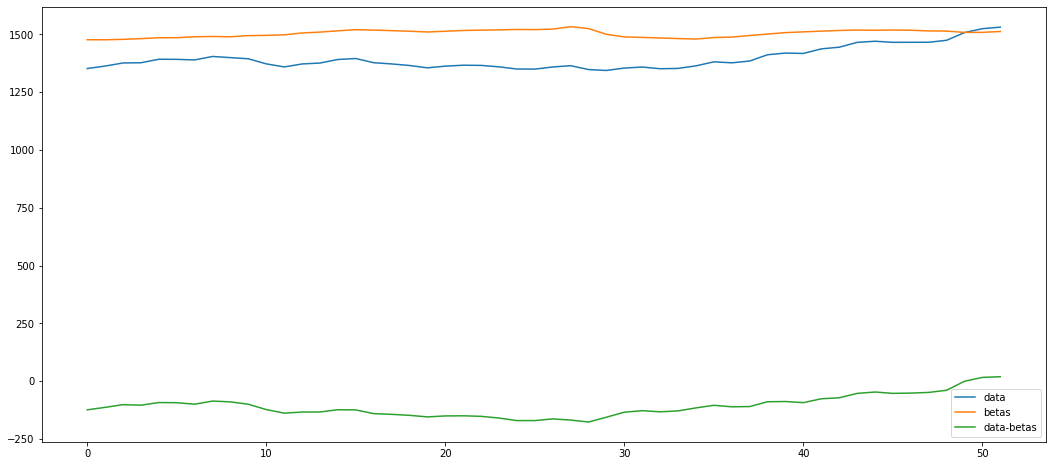

In [73]:
plt.plot(data[sample,:])
plt.plot(betas)
plt.plot(data[sample,:]-betas)
plt.legend(['data','betas','data-betas'])
plt.show()

### Ajuste del modelo utilizando polyfit

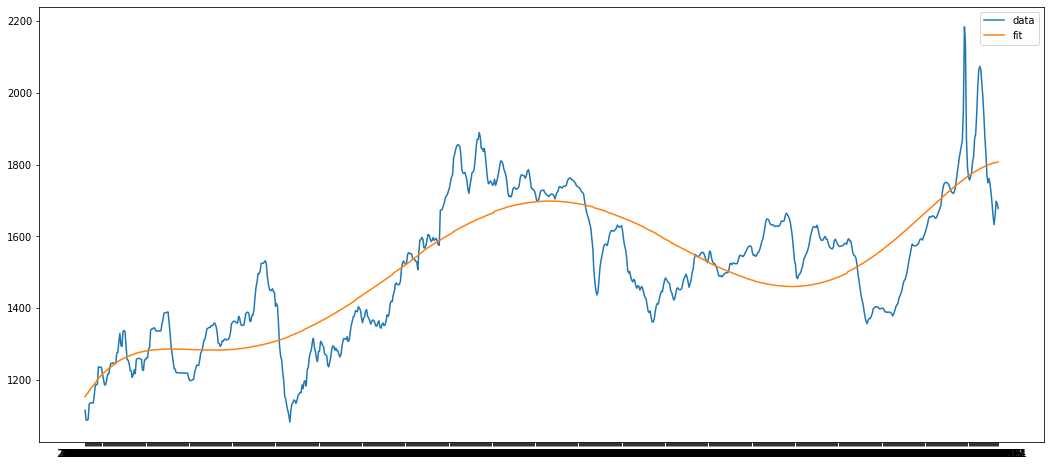

In [74]:
x = mdates.date2num(df.index)
f = 1/4

poly = np.polyfit(x, df, deg=6)

fig, ax = plt.subplots()
ax.plot(df, label='data')
ax.plot(df.index, np.polyval(poly, x), label='fit')
ax.legend()

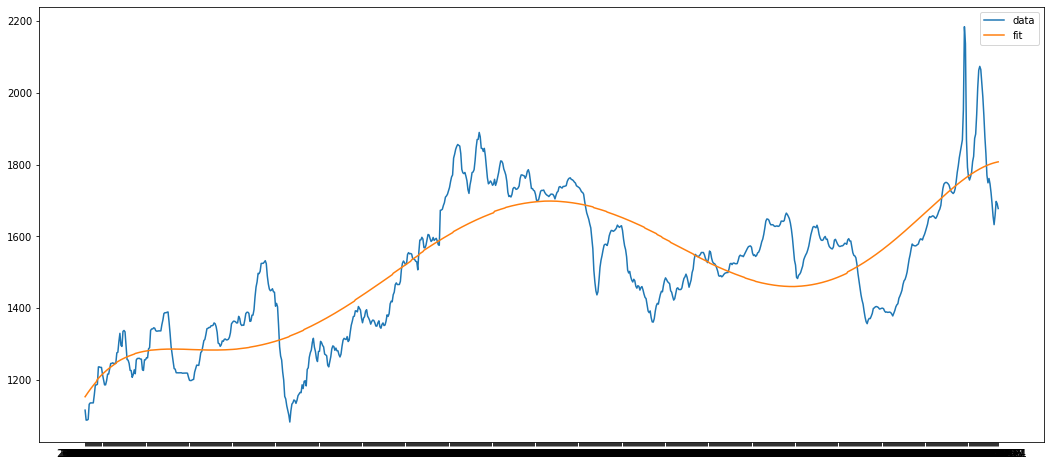

In [75]:
def objective(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

x = mdates.date2num(df.index)
popt, _ = curve_fit(objective, x, df)

a, b, c, d, e, f, g = popt

y_line = objective(x, a, b, c, d, e, f, g)

fig, ax = plt.subplots()
plt.plot(df, label="data")
plt.plot(df.index, y_line, label="fit")
ax.legend()